# Movie Data Exploration
This is an indepth walk through of my data cleaning and exploration process

## Importing and exploring the data
First, importing all the data set that were provided. Running the bellow cell will import **pandas** that we'll use to import that data sets as well as **numpy**, **matplotlib** and the data sets themselves.

In [1]:
# Running this cell will take a while but will import all of the data we have in one go.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', thousands=',')
imdbName = pd.read_csv('zippedData/new_imdb/name.basics.tsv.gz', sep='\t')
imdbTitleAkas = pd.read_csv('zippedData/new_imdb/title.akas.tsv.gz', sep='\t', compression='gzip', delimiter='\t', encoding='iso-8859-1', na_values=['\\N'])
imdbTitleBasics = pd.read_csv('zippedData/new_imdb/title.basics.tsv.gz', sep='\t', compression='gzip', delimiter='\t', encoding='iso-8859-1', na_values=['\\N'])
imdbTitleCrew = pd.read_csv('zippedData/new_imdb/title.crew.tsv.gz', sep='\t', na_values=['\\N'])
imdbTitleRatings = pd.read_csv('zippedData/new_imdb/title.ratings.tsv.gz', sep='\t', na_values=['\\N'])
imdbTitlePrin = pd.read_csv('zippedData/new_imdb/title.principals.tsv.gz', sep='\t', na_values=['\\N'])
rtMovie = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rtReviews = pd.read_csv('zippedData/new_imdb/name.basics.tsv.gz', sep='\t', compression='gzip', delimiter='\t', encoding='iso-8859-1')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

C:\Users\Sweet Deals\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Sweet Deals\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# First look at our data frames
Now that all the data is imported, let's check that they imported correctly.

In [2]:
# This data frame looks like it's only info on boxoffice gross
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# Uneccessary and becomes more trouble than it's worth to combine
imdbName

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0059956,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"
...,...,...,...,...,...,...
10505047,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10505048,nm9993716,Essias Loberg,\N,\N,NaN,\N
10505049,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10505050,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [4]:
# It appears that most of this data is either corrupted
# repeated with a different name or incomplete.
# This data is probably not worth making sense of.
imdbTitleAkas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,ÐÐ°ÑÐ¼ÐµÐ½ÑÑÑÐ°,UA,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0.0
2,tt0000001,3,Carmencita - spanyol tÃ¡nc,HU,NaN,imdbDisplay,NaN,0.0
3,tt0000001,4,ÎÎ±ÏÎ¼ÎµÎ½ÏÎ¯ÏÎ±,GR,NaN,imdbDisplay,NaN,0.0
4,tt0000001,5,ÐÐ°ÑÐ¼ÐµÐ½ÑÐ¸ÑÐ°,RU,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
24169281,tt9916852,4,ã¨ãã½ã¼ã #3.20,JP,ja,NaN,NaN,0.0
24169282,tt9916852,5,EpisÃ³dio #3.20,PT,pt,NaN,NaN,0.0
24169283,tt9916852,6,Episodio #3.20,IT,it,NaN,NaN,0.0
24169284,tt9916852,7,à¤à¤ªà¤¿à¤¸à¥à¤¡ #3.20,IN,hi,NaN,NaN,0.0


In [5]:
# Information about movie titles and their respoective genres
imdbTitleBasics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7342349,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010.0,NaN,NaN,"Action,Drama,Family"
7342350,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010.0,NaN,NaN,"Action,Drama,Family"
7342351,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010.0,NaN,NaN,"Action,Drama,Family"
7342352,tt9916856,short,The Wind,The Wind,0,2015.0,NaN,27,Short


In [6]:
# information about writing and directing staff.
# Usful if we need to know about hiring staff but perhaps irrelevant to monitary gain and reputation.
imdbTitleCrew

,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN
...,...,...,...
7342349,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7342350,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7342351,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7342352,tt9916856,nm10538645,nm6951431


In [7]:
# Information about populatiry and ratings.
imdbTitleRatings

,tconst,averageRating,numVotes
0,tt0000001,5.6,1660
1,tt0000002,6.1,203
2,tt0000003,6.5,1373
3,tt0000004,6.2,123
4,tt0000005,6.2,2161
...,...,...,...
1091113,tt9916580,7.2,5
1091114,tt9916690,6.6,5
1091115,tt9916720,6.0,66
1091116,tt9916766,6.9,15


In [8]:
# Staffing information and chracter names (if applicable) to actors/actresses. Will probably cause repeart row creation
# when combining cells data frames
imdbTitlePrin

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN
...,...,...,...,...,...,...
41887285,tt9916880,5,nm0996406,director,principal director,NaN
41887286,tt9916880,6,nm1482639,writer,NaN,NaN
41887287,tt9916880,7,nm2586970,writer,books,NaN
41887288,tt9916880,8,nm1594058,producer,producer,NaN


In [9]:
# information on box office sales and genres. Lacks movie title.
rtMovie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [10]:
# Staffing information about previously worked on titles and brith/death years
rtReviews

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0059956,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"
...,...,...,...,...,...,...
10505047,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10505048,nm9993716,Essias Loberg,\N,\N,NaN,\N
10505049,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10505050,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [11]:
# information about movie ratings based on movie title
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
# information about box offic gross based on movie title.
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Based on what we can see, as well as making some assumptions
* Based on where the data come from, we can conclude that some of these data frames will have consistent naming/labeling schemes with one another, such as those that came from imdb.
* Some of the data will be usable while some will not. And that's perfecetly fine. The right information is more imporatnt than the amount of information.
* The column 'tconst' seems to appear quite a bit, like a unique identifier for movie titles. This is important, especially considering that some movies could be named exactly the same but are totally different.

Let's try to join all imdb data frame on like values into one concatenated data frame.

First we need check what columns each data frame for the imdb's have in common.

In [13]:
# This code give a printed and organized list of columns per data frame.

print(
    '-imdbName: ', '\n',list(imdbName.columns),'\n',
    '-imdbTitleAkas: ','\n',list(imdbTitleAkas.columns),'\n',
    '-imdbTitleBasics', '\n',list(imdbTitleBasics.columns),'\n',
    '-imdbTitleCrew: ', '\n',list(imdbTitleCrew.columns),'\n',
    '-imdbTitleRatings: ', '\n',list(imdbTitleRatings.columns),'\n',
    '-imdbTitlePrin: ', '\n',list(imdbTitlePrin.columns)
)

-imdbName:  
 ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'] 
 -imdbTitleAkas:  
 ['titleId', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'isOriginalTitle'] 
 -imdbTitleBasics 
 ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres'] 
 -imdbTitleCrew:  
 ['tconst', 'directors', 'writers'] 
 -imdbTitleRatings:  
 ['tconst', 'averageRating', 'numVotes'] 
 -imdbTitlePrin:  
 ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']


It looks like **imdbTitleAkas** doesn't have any columns in common with the rest of the data from the other imdb data frames. Not only that but imdbTitleAkas was the data frame we saw with the corrupted data. It's probably best we ommit this data frame, entirely, rather than force it to fit in.

**imdbName** and **imdbTitlePrin** also poses some problems. Combining them will result in duplicate rows as they a list of the movie staff and not the movies them selves. And since almost every movie will have more than one person on staff, we'll get a list that has movies listed for each instance of a staff member for that movie. It's best we just manually explore these later if needed rather than including it now..

As for the rest, it seems that **imdbTitleBasics**, **imdbTitleCrew**, and **imdbTitleRatings** have 'tconst' in common. Let's combine them on 'tconst' for one concatenated list.

In [14]:
# Running this cell will combin all 3 Data frames into 1 data frame called 'imdb'.
imdbBasicsCrew = pd.merge(imdbTitleBasics, imdbTitleCrew, on=['tconst'])
imdb = pd.merge(imdbBasicsCrew, imdbTitleRatings, on=['tconst'])

In [15]:
# Let's run imdb to check for success.
imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",nm0005690,NaN,5.6,1660
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short",nm0721526,NaN,6.1,203
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance",nm0721526,NaN,6.5,1373
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12,"Animation,Short",nm0721526,NaN,6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short",nm0005690,NaN,6.2,2161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091113,tt9916580,tvEpisode,Horrid Henry Horrid Boy?,Horrid Henry Horrid Boy?,0,2012.0,NaN,10,"Animation,Comedy,Family",nm0996406,"nm1482639,nm2586970",7.2,5
1091114,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012.0,NaN,NaN,"Animation,Comedy,Family",nm0996406,"nm1482639,nm2586970",6.6,5
1091115,tt9916720,short,The Nun 2,The Nun 2,0,2019.0,NaN,10,"Comedy,Horror,Mystery",nm10538600,NaN,6.0,66
1091116,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019.0,NaN,43,"Family,Reality-TV",NaN,NaN,6.9,15


Success!...kinda. It seems our new data frame seems to have some extrenuous data (namely most values in the column 'titleType'). For simplicity's sake, we only care about box office movies. Let's check to see how many titleTypes we need to filter out.

In [16]:
pd.unique(imdb['titleType'])

array(['short', 'movie', 'tvShort', 'tvSeries', 'tvMovie', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

Out of these, we only TRUELY care about 'movie'. Let's filter everything else out. And while were at it let's get rid of all rows whos column value for **'isAdult'** is equal to 1...for obvious reasons...

In [17]:
imdb.drop(imdb.loc[imdb['titleType']=='tvEpisode'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvMiniSeries'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvMovie'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvShort'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvSpecial'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='tvSeries'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='video'].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='short'].index, inplace=True)
imdb.drop(imdb.loc[imdb['isAdult']==1].index, inplace=True)
imdb.drop(imdb.loc[imdb['titleType']=='videoGame'].index, inplace=True)

While we're at it, let's remove some columns that don't provide any usful information/aren't needed anymore.

In [18]:
imdb = imdb.drop(columns = ['tconst', 'titleType', 'isAdult', 'endYear'], axis = 1)

In [19]:
# Let's check for' success!
imdb

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
8,Miss Jerry,Miss Jerry,1894.0,45,Romance,nm0085156,nm0085156,5.9,155
259,Soldiers of the Cross,Soldiers of the Cross,1900.0,NaN,"Biography,Drama","nm0095714,nm0675140",NaN,6.0,39
337,Bohemios,Bohemios,1905.0,100,NaN,nm0063413,"nm0063413,nm0657268,nm0675388",4.7,7
371,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70,"Biography,Crime,Drama",nm0846879,nm0846879,6.1,597
391,Robbery Under Arms,Robbery Under Arms,1907.0,NaN,Drama,nm0533958,"nm0092809,nm0533958",4.5,14
...,...,...,...,...,...,...,...,...,...
1091096,DrÃ¸mmeland,DrÃ¸mmeland,2019.0,72,Documentary,nm5684093,NaN,6.5,40
1091097,Safeguard,Safeguard,2020.0,90,"Action,Adventure,Thriller",nm7308376,nm7308376,4.6,52
1091105,Coven,Akelarre,2020.0,90,"Drama,History,Horror",nm1893148,"nm1893148,nm3471432",5.9,134
1091108,The Secret of China,Hong xing zhao yao Zhong guo,2019.0,NaN,"Adventure,History,War",nm0910951,NaN,4.1,11


Success! We've cut down our data frame size from 1 mill+ to just over 250k results. This 'imdb' Data frame becomes one of data frame we use for querries about genre, reviews, and release years

Now, just like the imdb data frames, we also have rt data frames that are similar in name. Let's check to see if there is any consistance between these.

In [20]:
print(
    '-rtMovie: ', '\n',list(rtMovie.columns),'\n',
    '-rtReviews: ','\n',list(rtReviews.columns),'\n'
)

-rtMovie:  
 ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'] 
 -rtReviews:  
 ['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'] 



Hm, unfortunate. It looks like these two data frames don't have any joinable columns in common. rtMovie has some usful info about box office gross but no assocciated movie title. Vice versa, rtReviews has no usful info but presumably the assocciated movie titles for rtMovies. With no way to reliably join the two, we'll need to ommit them both.

Next, let's clean up some of the other data frames that are still usful to us. Tmdb has a some extranious info that we just don't need. 'genre_id' & 'id' are some columns we don't need. We need to make a decision about the data here as well. Since Microsoft is american company new to the movie scene it would be safest to start with english movies so let's filter out movies that are originally english.

In [21]:
# This code filters and removes all movies that aren't english (column value that isn't 'en').
tmdb.drop(tmdb.loc[tmdb['original_language']!='en'].index, inplace=True)
# This code removes columns that we don't need. Since we already filtered by languages, we dont need 'original-language' anymore.
tmdb = tmdb.drop(columns = ['genre_ids', 'id', 'original_language'])
# Check for success!
tmdb

,Unnamed: 0,original_title,popularity,release_date,title,vote_average,vote_count
0,0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,26512,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now, lets take at our **tn** data frame it looks like our columns with currency values are wirtten as stings instead of a numeric. This will cause a sorting problem so lets write a function to fix that.

In [22]:
# this code removes non-numeric symbols, leaving only the numbers and replacing the value in its place as a float
def dirtyMoney(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '').replace('\\', '').replace('N', ''))
    return(x)

# This code will apply the new function to the colums that represent money.
tn.worldwide_gross = tn.worldwide_gross.apply(dirtyMoney).astype(np.int64)
tn.domestic_gross = tn.domestic_gross.apply(dirtyMoney).astype(np.int64)
tn.production_budget = tn.production_budget.apply(dirtyMoney).astype(np.int64)

# This code will attempt to sort one of the columns so if our new function worked.

tn.sort_values('domestic_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
...,...,...,...,...,...,...
2709,10,"Mar 31, 2004",The Touch,20000000,0,5918742
2708,9,"Apr 13, 2010",Three Kingdoms: Resurrection of the Dragon,20000000,0,22139590
2707,8,"Dec 31, 2012",Zambezia,20000000,0,34454336
2706,7,"Dec 31, 2008",Admiral,20000000,0,38585047


Success! Lastely, data frame **bom** has a column 'studio' doesn't provide any significant info. Let's remove that as well as filling some of the NaN values with 0.

In [23]:
bom = bom.fillna(0)
bom = bom.drop(columns = 'studio')
bom

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010
...,...,...,...,...
3382,The Quake,6200.0,0.0,2018
3383,Edward II (2018 re-release),4800.0,0.0,2018
3384,El Pacto,2500.0,0.0,2018
3385,The Swan,2400.0,0.0,2018


Success!

Let's recall what we have so far and take a look at what we have once more.
* imdb - info about genre and rating per movie
* tmdb - info about genre and rating per movie
* tn - info bout box office gross per movie
* bom - info bout box office gross per movie

In [24]:
imdb.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
8,Miss Jerry,Miss Jerry,1894.0,45,Romance,nm0085156,nm0085156,5.9,155
259,Soldiers of the Cross,Soldiers of the Cross,1900.0,NaN,"Biography,Drama","nm0095714,nm0675140",NaN,6.0,39
337,Bohemios,Bohemios,1905.0,100,NaN,nm0063413,"nm0063413,nm0657268,nm0675388",4.7,7
371,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70,"Biography,Crime,Drama",nm0846879,nm0846879,6.1,597
391,Robbery Under Arms,Robbery Under Arms,1907.0,NaN,Drama,nm0533958,"nm0092809,nm0533958",4.5,14


In [25]:
tmdb.head()

,Unnamed: 0,original_title,popularity,release_date,title,vote_average,vote_count
0,0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [27]:
bom.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010


Between all 4 of these data frames we've cleaned and made it seems like each have something new to offer. So, we may need to combine them to find a correlation between separate information that we may later deem pertinent. To make it easier on outselves later, we take the titles and years of the movies as our join points. Here we'll rename the corresponding columns so that all match in name.

In [28]:
imdb = imdb.rename(columns = {'primaryTitle': 'movieTitle'})
bom = bom.rename(columns = {'title': 'movieTitle'})
tn = tn.rename(columns = {'movie': 'movieTitle'})
tmdb = tmdb.rename(columns = {'title': 'movieTitle'})
imdb = imdb.rename(columns = {'startYear': 'year'})

Now let's check the data types of out movies with a release year to make sure they can combine as a float.

In [29]:
bom.year.dtype

dtype('int64')

In [30]:
imdb.year.dtype

dtype('float64')

Perfect.

# Second exploration and application for findind desired results

Our first step here is to define what result we want by the questions we have.

* 1.) What movies made the most profit? Are there any traits in common with those?
* 2.) What movies have the highest Rating?
* 3.) How should Microsoft take this information and act upon it.

Now, we can finally ask our data some questions and get usful infomation. Since were looking for exacutable information for a large corperation money will be our driving factor.

### 1.) What movies made the most profit? Are there any traits in common with those?

Let's start by merging **imdb** and **bom** into one data frame, first. We're doing this because we're going to need to see the atributes in common with our top results anyways. Doing the cleaning and using that data helps keep consistancy. After we'll sort the values of column 'domestic_gross' and return only the top 50 results to get our all time highest earner. We'll save this sorting as it's own variable so that we don't mess with the original data.

In [31]:
imdbBom = pd.merge(imdb, bom, on=['movieTitle', 'year'])
imdbBomDom = imdbBom.sort_values('domestic_gross', ascending=False).head(5)
imdbBomDom.head()

,movieTitle,originalTitle,year,runtimeMinutes,genres,directors,writers,averageRating,numVotes,domestic_gross,foreign_gross
726,Black Panther,Black Panther,2018.0,134,"Action,Adventure,Sci-Fi",nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",7.3,613622,700100000.0,646900000.0
1445,Avengers: Infinity War,Avengers: Infinity War,2018.0,149,"Action,Adventure,Sci-Fi","nm0751648,nm0751577","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",8.4,811986,678800000.0,1369.5
4,Jurassic World,Jurassic World,2015.0,124,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",7.0,573593,652300000.0,1019.4
1339,Incredibles 2,Incredibles 2,2018.0,118,"Action,Adventure,Animation",nm0083348,nm0083348,7.6,243526,608600000.0,634200000.0
1377,Rogue One: A Star Wars Story,Rogue One,2016.0,133,"Action,Adventure,Sci-Fi",nm2284484,"nm0919363,nm0006904,nm0461306,nm1729428,nm0000184",7.8,544589,532200000.0,523900000.0


"Black Panther" is our winner. Nice.

Next, lets use matplotlib to help create a nice horizontal bar graph for data visualization. We'll be sure to save this data visualization for later viewing.

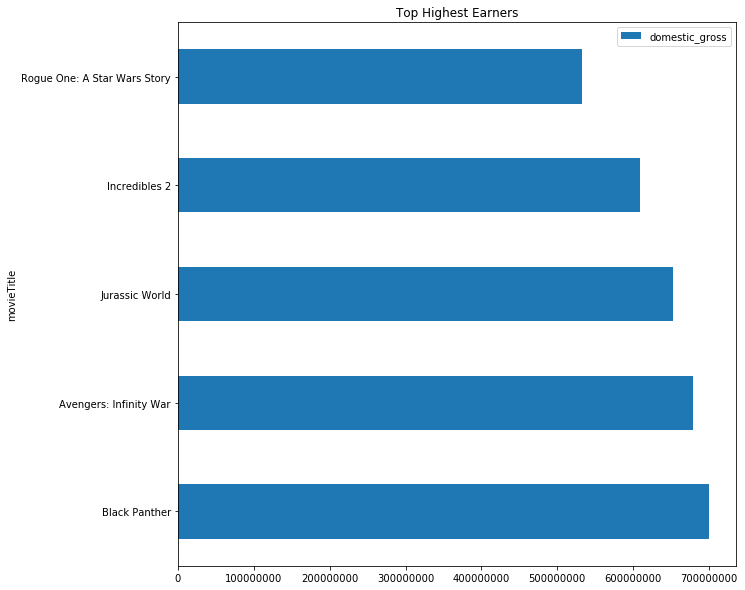

In [32]:
imdbBomDom.plot('movieTitle', 'domestic_gross', kind='barh', figsize = (10, 10))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Top Highest Earners')
# plt.savefig('imdbBom-highest-earners.pdf')

So, we have a nice and neat bar plot of what some of the most profitable movies have been for a domestic audience. But that doesn't help us unless we know the properties of these movies. We need to know what *about* the movie made it desireable. It's not all lost, however. What it does let us know is that, the group we've grabbed are highest earners. That means that any data within the defined group is all relevant and we already filtered out data that could be considered invalid. Microsoft, the big corperation that they are, would be interested in making as much money as they can. Let's explore that more through a count of genres and their combination per movie, staring with the top 1,000 highest earners.

In [33]:
imdbBomDom2 = imdbBom.sort_values('domestic_gross', ascending=False).head(1000)
imdbBomDom2['genres'].value_counts().head(50)

Adventure,Animation,Comedy    62
Action,Adventure,Sci-Fi       52
Comedy,Drama,Romance          40
Comedy                        37
Comedy,Drama                  33
Comedy,Romance                32
Drama,Romance                 26
Action,Comedy,Crime           25
Horror,Mystery,Thriller       25
Action,Adventure,Fantasy      24
Action,Crime,Thriller         22
Action,Thriller               22
Action,Adventure,Comedy       19
Action,Adventure,Drama        19
Biography,Drama,History       18
Drama                         18
Action,Crime,Drama            18
Action,Adventure,Thriller     16
Action,Adventure,Animation    15
Biography,Comedy,Drama        15
Biography,Drama               15
Crime,Drama,Thriller          14
Drama,Thriller                12
Biography,Crime,Drama         11
Comedy,Family                 10
Action,Drama,Thriller          9
Adventure,Comedy,Family        8
Action,Sci-Fi,Thriller         8
Horror,Thriller                8
Adventure,Comedy,Drama         8
Comedy,Cri

Here, we can see that the 'Drama' genre is by far the most popular. However, at a glace it would seem that 'Action', 'Adventure', 'Comedy' and 'Sci-Fi' come up more often as attributes of other genre combinations. We can see this is true by the very next two entreis right bellow Drama as show by "Action, Animation, Comdey' and 'Action, Adventure, Sci-Fi'. We can see this is true still if we narrow back in on our data.

In [34]:
imdbBomDom3 = imdbBom.sort_values('domestic_gross', ascending=False).head(100)
imdbBomDom3['genres'].value_counts().head(50)

Action,Adventure,Sci-Fi       24
Adventure,Animation,Comedy    19
Action,Adventure,Fantasy       8
Action,Adventure,Comedy        8
Action,Adventure,Thriller      7
Action,Adventure,Animation     4
Adventure,Fantasy              3
Adventure,Drama,Sci-Fi         2
Horror                         2
Action,Adventure,Drama         2
Action,Adventure,Crime         2
Action,Adventure,Mystery       2
Comedy                         2
Action,Adventure               1
Biography,Drama,History        1
Drama,Fantasy,Romance          1
Action,Adventure,Horror        1
Animation,Comedy,Family        1
Action,Biography,Drama         1
Adventure,Animation,Family     1
Action,Adventure,Family        1
Animation,Comedy,Crime         1
Comedy,Music                   1
Action,Drama,History           1
Drama,Horror,Sci-Fi            1
Biography,Drama,Music          1
Drama,Sci-Fi,Thriller          1
Action,Comedy,Crime            1
Name: genres, dtype: int64

Drama, though still close to the top, has now moved down to 3rd place. Let's run another experiment to cover our bases. This time we'll filter out any movies that grossed less that $10,000,000 and then get a value count of genres from that new list. This will be our broadest check but remember that anything in this list made at least (and often much more) and 10 millino dollars. That is still a large enough sum of money to at least be considered valid.

In [35]:
imdbBomHighDoll = imdbBom.loc[imdbBom['domestic_gross'] >= 10000000]
imdbBomHighDoll['genres'].value_counts().head(50)

Adventure,Animation,Comedy    61
Action,Adventure,Sci-Fi       52
Comedy,Drama,Romance          36
Comedy                        34
Comedy,Drama                  32
Comedy,Romance                30
Action,Comedy,Crime           25
Action,Adventure,Fantasy      24
Horror,Mystery,Thriller       23
Drama,Romance                 22
Action,Thriller               21
Action,Crime,Thriller         20
Drama                         18
Action,Adventure,Drama        18
Action,Crime,Drama            17
Biography,Drama,History       16
Action,Adventure,Thriller     16
Action,Adventure,Comedy       15
Action,Adventure,Animation    14
Crime,Drama,Thriller          13
Biography,Comedy,Drama        13
Biography,Drama               13
Biography,Crime,Drama         10
Comedy,Family                 10
Action,Drama,Thriller          9
Drama,Thriller                 9
Adventure,Comedy,Family        8
Action,Sci-Fi,Thriller         8
Horror,Thriller                8
Adventure,Comedy,Drama         7
Adventure,

Inteseting! Our data now has change slightly, once again. We see that Drama commands the lead with the most common genre. But now we've see comedy has been take the 2nd, 3rd, and 4th place spot for most common. If we take a look back, we can see that comedy has been very present across every check in all the top 5 spots. People like to laugh!

Now - just to double check our work - let's make sure that something fishy isn't going on with out results and check the bottom earners.

In [36]:
imdbBomDom2['genres'].value_counts().tail(50)

Drama,Sci-Fi,Thriller            1
Adventure,Mystery,Sci-Fi         1
Action,Romance,Thriller          1
Crime,Horror,Thriller            1
Adventure,Family,Sci-Fi          1
Adventure,Documentary,Sport      1
Adventure,Drama,Family           1
Adventure,Crime,Drama            1
Comedy,Horror,Romance            1
Drama,History,War                1
Comedy,Documentary               1
Comedy,Crime,Romance             1
Action,Horror,Thriller           1
Drama,War                        1
Comedy,Drama,Mystery             1
Mystery,Thriller                 1
Adventure,Comedy,Music           1
Action,Crime,Mystery             1
Action,Mystery,Sci-Fi            1
Fantasy,Horror,Mystery           1
Comedy,Sport                     1
Adventure,Comedy,Fantasy         1
Biography,Documentary,History    1
Drama,Family,Fantasy             1
Drama,Sci-Fi                     1
Crime,Drama,History              1
Adventure,Biography,Comedy       1
Drama,Fantasy,Music              1
Adventure,Comedy,Sci

In [37]:
# The result here will look the same as the top because the list total list is shorter that 50 results.
imdbBomDom3['genres'].value_counts().tail(50)

Action,Adventure,Sci-Fi       24
Adventure,Animation,Comedy    19
Action,Adventure,Fantasy       8
Action,Adventure,Comedy        8
Action,Adventure,Thriller      7
Action,Adventure,Animation     4
Adventure,Fantasy              3
Adventure,Drama,Sci-Fi         2
Horror                         2
Action,Adventure,Drama         2
Action,Adventure,Crime         2
Action,Adventure,Mystery       2
Comedy                         2
Action,Adventure               1
Biography,Drama,History        1
Drama,Fantasy,Romance          1
Action,Adventure,Horror        1
Animation,Comedy,Family        1
Action,Biography,Drama         1
Adventure,Animation,Family     1
Action,Adventure,Family        1
Animation,Comedy,Crime         1
Comedy,Music                   1
Action,Drama,History           1
Drama,Horror,Sci-Fi            1
Biography,Drama,Music          1
Drama,Sci-Fi,Thriller          1
Action,Comedy,Crime            1
Name: genres, dtype: int64

In [38]:
imdbBomLowDoll = imdbBom.loc[imdbBom['domestic_gross'] <= 10000000]
imdbBomLowDoll['genres'].value_counts().tail(50)

Documentary,Drama,History      1
Crime,Romance,Thriller         1
Music                          1
Adventure,Comedy,Western       1
Comedy,Family,Sci-Fi           1
Fantasy,Horror,Sci-Fi          1
Crime,Documentary,Drama        1
Crime,Horror,Thriller          1
Drama,Fantasy,Horror           1
Action,Biography,History       1
Action,Drama,Music             1
Biography,Documentary,Sport    1
Documentary,Musical            1
Fantasy                        1
Comedy,Fantasy,Romance         1
Fantasy,Romance                1
Adventure,Comedy,History       1
Comedy,Fantasy                 1
Biography,Drama,Family         1
Biography,Drama,Music          1
Crime,Drama,Music              1
Action,Comedy,Horror           1
Documentary,Drama,Music        1
Action,Fantasy,Horror          1
Action,Comedy,Mystery          1
Adventure,Drama,Thriller       1
Fantasy,Horror,Thriller        1
Mystery,Thriller               1
Comedy,Drama,War               1
Adventure,Biography,Drama      1
Action,Hor

As I expected, the results are the same. But that's to be expected when talking about money.

1.) What movie's made the most profit? Are there any traits in common with those?

A: The data would suggest that
* The movies that see the most box office success, both as one of the most common and as one of the highest earners, is 'Adventure, Animation, & Comedy'.
* Action, Adventure, & Sci-Fi is the second most common of the highest earners
* Action, Adventure, & Sci-Fi is the single highest earner genre combination

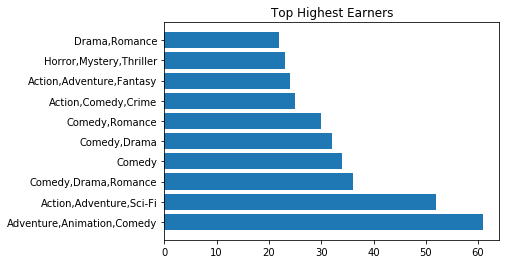

In [39]:
imdbPlt = imdbBomHighDoll['genres'].value_counts().head(10)
plt.barh(imdbPlt.index, imdbPlt)
plt.title('Top Highest Earners')
# plt.savefig('top-highest-earners-genres.pdf')

### 2.) What movies have the highest Rating?

First, we'll need to take a look at our data again but sort it on **numVotes**. numVotes is the number of times a person has rated a particular movie. We can take a way from this that the higher the numVotes value, the more talked about a movie is. However, 'most popular' doesn't always mean 'best'. It would be more accurate to say that higher NumVotes only means more attention and attention is one thing we need more of for building a brand image.

The code bellow filters out any rows bellow 10,000 votes and then sorts them by the highest rated movies first. We've invalidating those movies who didn't set a good enough example for gaining traction. Let's take a look at who's at the top.

In [40]:
imdbNumV = imdb.loc[imdb['numVotes'] >= 10000]
imdbNumV.sort_values('numVotes', ascending=False)
imdbNumVTop = imdbNumV.sort_values('averageRating', ascending=False).head(5)
imdbNumVTop

,movieTitle,originalTitle,year,runtimeMinutes,genres,directors,writers,averageRating,numVotes
81555,The Shawshank Redemption,The Shawshank Redemption,1994.0,142,Drama,nm0001104,"nm0000175,nm0001104",9.3,2305519
152144,The Chaos Class,Hababam Sinifi,1975.0,87,"Comedy,Drama",nm0251027,"nm0119457,nm0407642",9.3,36623
45521,The Godfather,The Godfather,1972.0,175,"Crime,Drama",nm0000338,"nm0701374,nm0000338",9.2,1591143
740959,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013.0,139,"Comedy,Documentary",nm2339782,nm0948000,9.2,43634
902382,Mirror Game,Aynabaji,2016.0,147,"Crime,Mystery,Thriller",nm2755490,"nm7861816,nm7861817,nm7861818",9.1,22046


'The Shawsank Redemption' and 'The Chaos Class' seem to be tied for our top spot. Let's make a little Data visualization for it while we're still thinking about it.

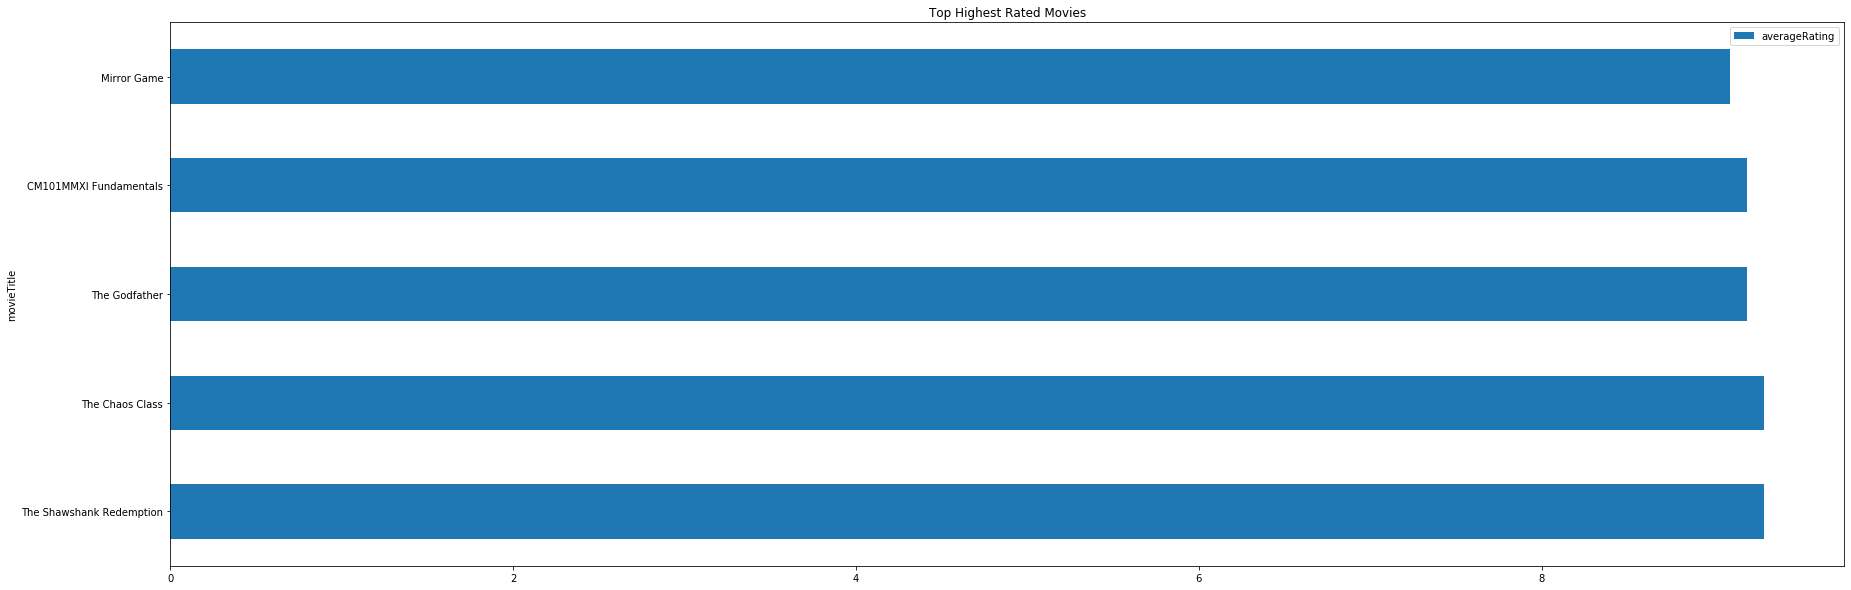

In [41]:
imdbNumVTop.plot('movieTitle', 'averageRating', kind='barh', figsize = (30, 10))
plt.title('Top Highest Rated Movies')
# plt.savefig('imdb-highest-rated.pdf')

Next, we can use the new filtered data frame to sort out our averageRating to find what genres were the most liked. As we're trying to only validate movies that had a rating betetr than a D, anything less that a 7.0 rating will be ommitted. Just like last time, we'll take the top 100 ratings, top 1,000, and create a cut-off for totally invalidadted rows (voted at least 7.0).

In [42]:
imdbAvRat = imdbNumV.sort_values('averageRating', ascending = False).head(100)
imdbAvRat2 = imdbNumV.sort_values('averageRating', ascending = False).head(1000)
imdbAvRat3 = imdbNumV.loc[imdb['averageRating'] >= 7.0]

In [43]:
imdbAvRat['genres'].value_counts().head(50)

Drama                            11
Crime,Drama                       6
Comedy,Drama                      6
Action,Crime,Drama                5
Action,Adventure,Drama            5
Drama,Romance                     4
Comedy,Romance                    3
Documentary                       3
Adventure,Comedy,Drama            3
Crime,Drama,Thriller              3
Comedy                            2
Action,Sci-Fi                     2
Biography,Drama,History           2
Western                           2
Action,Adventure,Fantasy          2
Biography,Crime,Documentary       2
Comedy,Drama,Romance              2
Comedy,Drama,Family               1
Drama,War                         1
Crime,Drama,Mystery               1
Biography,Drama,Music             1
Comedy,Drama,Western              1
Comedy,Crime,Romance              1
Biography,Documentary,History     1
Adventure,Comedy,Sci-Fi           1
Comedy,Documentary                1
Comedy,Drama,History              1
Action,Drama,War            

In [44]:
imdbAvRat2['genres'].value_counts().head(50)

Drama                          102
Drama,Romance                   45
Comedy,Drama                    42
Comedy,Drama,Romance            30
Action,Crime,Drama              25
Crime,Drama                     25
Biography,Drama,History         23
Crime,Drama,Thriller            22
Drama,War                       21
Documentary                     19
Crime,Drama,Mystery             19
Comedy,Romance                  16
Biography,Drama                 15
Adventure,Animation,Comedy      15
Action,Adventure,Sci-Fi         14
Action,Adventure,Animation      12
Comedy,Crime,Drama              12
Comedy                          11
Biography,Crime,Drama           11
Drama,Thriller                  11
Crime,Drama,Film-Noir           11
Adventure,Comedy,Drama           9
Action,Adventure,Drama           8
Adventure,Biography,Drama        8
Drama,Family                     7
Mystery,Thriller                 7
Documentary,Music                7
Drama,Music                      7
Action,Adventure,Com

In [45]:
imdbAvRat3['genres'].value_counts().head(50)

Drama                         266
Comedy,Drama                  189
Drama,Romance                 169
Comedy,Drama,Romance          169
Crime,Drama,Thriller          109
Action,Crime,Drama            106
Biography,Drama,History        80
Crime,Drama                    78
Crime,Drama,Mystery            70
Comedy                         66
Adventure,Animation,Comedy     61
Biography,Drama                57
Biography,Crime,Drama          51
Comedy,Crime,Drama             47
Drama,Thriller                 46
Action,Adventure,Sci-Fi        46
Documentary                    45
Drama,War                      42
Comedy,Romance                 42
Action,Crime,Thriller          39
Action,Adventure,Drama         38
Action,Adventure,Comedy        37
Biography,Comedy,Drama         35
Drama,Mystery,Thriller         35
Comedy,Drama,Music             34
Action,Adventure,Animation     34
Action,Comedy,Crime            31
Comedy,Drama,Fantasy           30
Crime,Drama,Romance            28
Action,Drama,H

So, here is something interesting that we didn't see in the our domestic_gross check. Here, we see that Drama is the undisputed champion of all with not only the most common grenre type for all three checks but also holds the very top spot for being the highest rated genre at 9.3 Average Rating

However, once again wee see that comedy has come in second again as 'Comedy, Drama' for the most common data type for 2/3 checks


Once again, let's make a nice and neat Horizontal Bar Graph

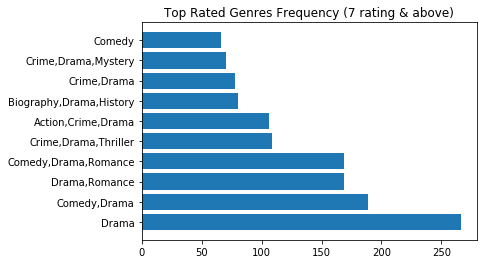

<Figure size 432x288 with 0 Axes>

In [46]:
test = imdbAvRat3['genres'].value_counts().head(10)
plt.barh(test.index, test)
plt.title('Top Rated Genres Frequency (7 rating & above)')
plt.show()
# plt.savefig('imdb-most-common-genres.pdf')

So, here is something interesting that we didn't see in the our domestic_gross check. Here, we see that Drama is the undisputed champion of all with not only the most common grenre type for all three checks but also holds the very top spot for being the highest rated genre at 9.3 Average Rating

However, We can see that 'Comedy, Drama' was consitantly high placing in all 3 'highly rated' check. This tells us that there's a high demand for this genre combination as well.

### 2.) What movies have the highest Rating?

The data shows that
* Purely drama movies have the highest ratings as well as being the most common genre type.
* The second most common genre combination is Comedy & Drama

### 3.) Is there a correlation between the results we've found?

Let's make a quick scatter plot to see if there are any tendencies betwen our high earning movies and our highly rated movies.

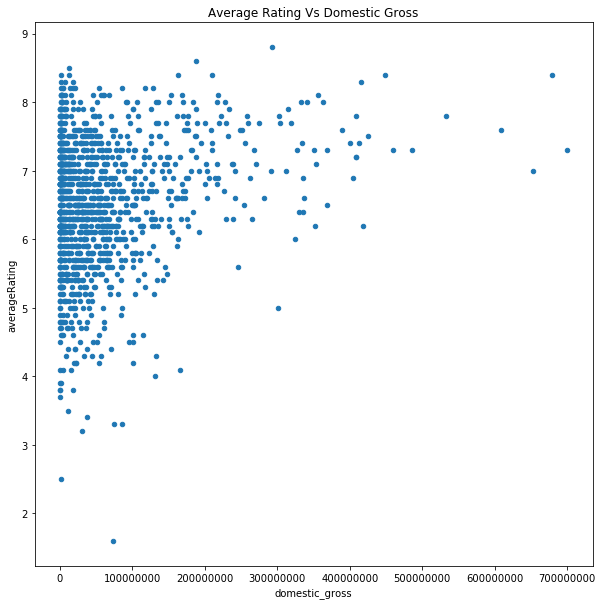

In [47]:
imdbDomRat = imdbBom.loc[imdbBom['numVotes'] >= 10000].sort_values('domestic_gross', ascending = False)
imdbDomRat.plot('domestic_gross', 'averageRating', kind='scatter', figsize=(10,10))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average Rating Vs Domestic Gross')
# plt.savefig('rated-vs-gross.pdf')

Hm, it would seem that a large tendancy of the results fall well between a rating average of 5-8 and a gross value of 100,000,000 or less. However, we do see something else. Almost all of the highest grossing movies have a tendacy to rate between 6-9.

Let's see if there's a correlation between 'Domestic Gross' and 'Production Budget' to see if it can explain away out inconsistncies in gross.

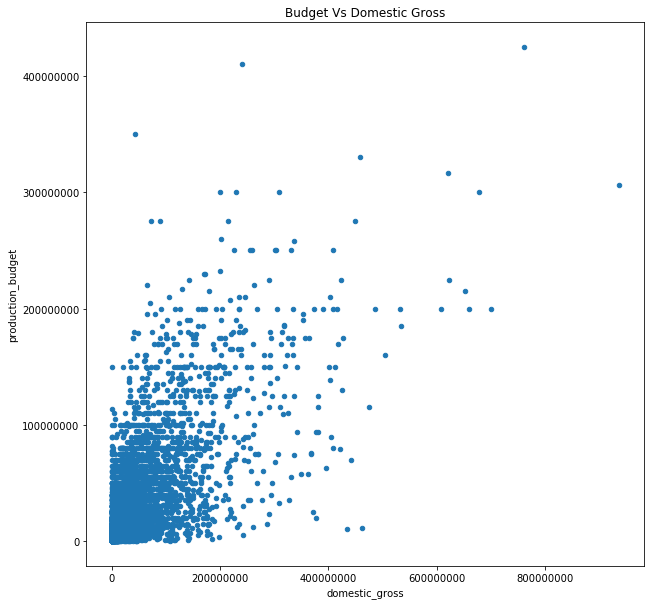

In [48]:
tn.plot('domestic_gross', 'production_budget', kind='scatter', figsize=(10,10))
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Budget Vs Domestic Gross')
# plt.savefig('budget-vs-DomGross.pdf')

Ah ha! This data is extremely clear! Aproximately a 200% return on investments. And we can surmise that not every movie budget is created equally. It would make sense that there would be a higher frequency of lower budget movies since it's an easier pill to swallow should the movie flop. Not to mention that not all movie studios have the same amount of resources.

### 3.) Is there a correlation between the results we've found?

'Bigger budget' more often means 'bigger profit'. This seems to coincide with what we'd see in our genres, somewhat. Higher rated movies did have a small tendancy to have a high domestic gross. That implies these movies had a higher production budget.